### Run all cells, the interactive plot is at the bottom

In [25]:
using Interact, StatsPlots, DataFrames, CSV, Dates;
include("plotting_functions.jl");
#WebIO.install_jupyter_nbextension() # might need to reload page afterwards in order to work

#### Choose the parameter combination to evaluate in the interactive plot (see results folder)

In [26]:
 @manipulate for start=1:24:767 # evalutation: all = 1439, summer/winter = 359, test: 767/719
    season1="summer"
    season2="winter"
    network="Pendulum"
    stop="best"
    show=1
    Data_df1 = read_data(season1, case="$(season1)_L2_nns_abort-0", network=network, stop=stop);
    Data_df2 = read_data(season2, case="$(season2)_L2_nns_abort-0", network=network, stop=stop);
    #CSV.write("out/results_$(season)_$(network)_all.csv", Data_df);
    
    #p0=bar_row(bar_actions, Data_df, start, "kWh", "Actions taken for B and HP", show);
    p11=bar_row(bar_PV, Data_df1, 241, "kWh", "", show, legend=false);
    p12=bar_row(bar_demand, Data_df1, 241, "kWh", "", show, legend=false);
    p13=bar_row(bar_heat, Data_df1, 241, "kWh", "", show, legend=false);
    p14=bar_row(bar_comfort, Data_df1, 241, "comfort ranges", "", show, legend=false);
    
    p21=bar_row(bar_PV, Data_df2, 49, "", "", show);
    p22=bar_row(bar_demand, Data_df2, 49, "", "", show);
    p23=bar_row(bar_heat, Data_df2, 49, "", "", show);
    p24=bar_row(bar_comfort, Data_df2, 49, "", "", show);
    
    energy_use1 = calc_energy_use(Data_df1);
    self_consumption1 = calc_self_consumption(Data_df1);
    self_sufficiency1 = calc_self_sufficiency(Data_df1);
    comfort_violations1 = calc_comfort_violations(Data_df1); ;
    profit1 = calc_profit(Data_df1; p_sell=0.1);
    
    energy_use2 = calc_energy_use(Data_df2);
    self_consumption2 = calc_self_consumption(Data_df2);
    self_sufficiency2 = calc_self_sufficiency(Data_df2);
    comfort_violations2 = calc_comfort_violations(Data_df2); ;
    profit2 = calc_profit(Data_df2; p_sell=0.1);
    
        vbox(vskip(1em),
        hbox(pad(0.1em, md"*Profit [EUR]:*"), hskip(1em), profit1,
            pad(1em, md"*Energy use  [kWh]:*"), hskip(2em), energy_use1, 
            pad(1em, md"*Self-consumption rate [%]:*"), hskip(1em),self_consumption1,
            pad(1em, md"*Self-sufficiency rate [%]:*"), hskip(1em), self_sufficiency1,
            pad(1em, md"*Comfort violations [#]:*"), hskip(1em), comfort_violations1),
        hbox(pad(0.1em, md"*Profit [EUR]:*"), hskip(1em), profit2,
            pad(1em, md"*Energy use  [kWh]:*"), hskip(2em), energy_use2, 
            pad(1em, md"*Self-consumption rate [%]:*"), hskip(1em),self_consumption2,
            pad(1em, md"*Self-sufficiency rate [%]:*"), hskip(1em), self_sufficiency2,
            pad(1em, md"*Comfort violations [#]:*"), hskip(1em), comfort_violations2),
                        
         vskip(1em),
         md"**OUTPUT:**",
         vskip(1em),
         hbox(
            vbox(
                plot(p21,p23,p22,p24, layout=(2,2), size=(2*320, 2*220))),
                #plot(p11,p13,p12,p14, layout=(2,2), size=(2*240, 2*220))), 
            hskip(4em),
            vbox(
                #plot(p21,p23,p22,p24, layout=(2,2), size=(2*320, 2*220)))
                plot(p11,p13,p12,p14, layout=(2,2), size=(2*240, 2*220)))
            ));
        end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["start"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 32, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
16, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Lissy\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Lissy\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Lissy\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Lissy\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Lissy\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000192e41a0, Task (runnable) @0x00000000192e41a0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"25\",\"49\",\"73\",\"97\",\"121\",\"145\",\"169\",\"193\",\"217\",\"241\",\"265\",\"289\",\"313\",\"337\",\"361\",\"385\",\"409\",\"433\",\"457\",\"481\",\"505\",\"529\",\"553\",\"577\",\"601\",\"625\",\"6

In [27]:
#savefig("summer.png")

In [28]:
@manipulate for start=1:24:767, # evalutation: all = 1439, summer/winter = 359, test: 767/719
    show=1:1:8,
    season=["winter", "summer", "all"],
    network=["Pendulum", "Yu"],
    stop=["final", "best"]
    
    Data_df = read_data(season, case="$(season)_L2_nns_no-abort", network=network, stop=stop);
    #CSV.write("out/results_$(season)_$(network)_all.csv", Data_df);
    
    p0=bar_row(bar_actions, Data_df, start, "kWh", "Actions taken for B and HP", show);
    p1=bar_row(bar_PV, Data_df, start, "kWh", "Sinks of PV generation (>0) and battery load (<0)", show);
    p2=bar_row(bar_demand, Data_df, start, "kWh", "Sources of electricity demand fulfillment", show);
    p3=bar_row(bar_heat, Data_df, start, "kWh", "Sources of heat pump demand fulfillment", show);
    p4=bar_row(bar_comfort, Data_df, start, "comfort ranges", "Heat pump SOCs and comfort ranges", show);
    
    energy_use = calc_energy_use(Data_df);
    self_consumption = calc_self_consumption(Data_df);
    self_sufficiency = calc_self_sufficiency(Data_df);
    comfort_violations = calc_comfort_violations(Data_df); ;
    profit = calc_profit(Data_df; p_sell=0.1);
    
        vbox(vskip(1em),
        hbox(pad(0.1em, md"*Profit [EUR]:*"), hskip(1em), profit,
            pad(1em, md"*Energy use  [kWh]:*"), hskip(2em), energy_use, 
            pad(1em, md"*Self-consumption rate [%]:*"), hskip(1em),self_consumption,
            pad(1em, md"*Self-sufficiency rate [%]:*"), hskip(1em), self_sufficiency,
            pad(1em, md"*Comfort violations [#]:*"), hskip(1em), comfort_violations),
                        
         vskip(1em),
         md"**OUTPUT:**",
         vskip(1em),
         plot(p0,p1,p2,p3,p4, layout=(5,1), size=(show*275, 5*220)));
    end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["start"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 32, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
16, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Lissy\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Lissy\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Lissy\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Lissy\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Lissy\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000019350650, Task (runnable) @0x0000000019350650), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"25\",\"49\",\"73\",\"97\",\"121\",\"145\",\"169\",\"193\",\"217\",\"241\",\"265\",\"289\",\"313\",\"337\",\"361\",\"385\",\"409\",\"433\",\"457\",\"481\",\"505\",\"529\",\"553\",\"577\",\"601\",\"625\",\"6

In [29]:
# Optimal benchmark
@manipulate for start=1:24:359, 
    show=1:1:8,
    season=["winter", "summer"]
    
    Data_df = read_data(season);
    
    p1=bar_row(bar_PV, Data_df, start, "kWh", "Sinks of PV generation (>0) and battery load (<0)", show);
    p2=bar_row(bar_demand, Data_df, start, "kWh", "Sources of electricity demand fulfillment", show);
    p3=bar_row(bar_heat, Data_df, start, "kWh", "Sources of heat pump demand fulfillment", show);
    p4=bar_row(bar_comfort, Data_df, start, "comfort ranges", "Heat pump SOCs and comfort ranges", show);
    
    energy_use = calc_energy_use(Data_df);
    self_consumption = calc_self_consumption(Data_df);
    self_sufficiency = calc_self_sufficiency(Data_df);
    comfort_violations = calc_comfort_violations(Data_df); ;
    profit = calc_profit(Data_df; p_sell=0.1);
    
        vbox(vskip(1em),
        hbox(pad(0.1em, md"*Profit [EUR]:*"), hskip(1em), profit,
            pad(1em, md"*Energy use  [kWh]:*"), hskip(2em), energy_use, 
            pad(1em, md"*Self-consumption rate [%]:*"), hskip(1em),self_consumption,
            pad(1em, md"*Self-sufficiency rate [%]:*"), hskip(1em), self_sufficiency,
            pad(1em, md"*Comfort violations [#]:*"), hskip(1em), comfort_violations),
                        
         vskip(1em),
         md"**OUTPUT:**",
         vskip(1em),
         plot(p1,p2,p3,p4, layout=(4,1), size=(show*275, 4*220)));
    end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["start"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 15, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
8, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Lissy\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Lissy\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Lissy\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Lissy\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Lissy\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000001a7468b0, Task (runnable) @0x000000001a7468b0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"25\",\"49\",\"73\",\"97\",\"121\",\"145\",\"169\",\"193\",\"217\",\"241\",\"265\",\"289\",\"313\",\"337\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"1663970678655037385\",\"id\":\"150022033

In [30]:
using BSON

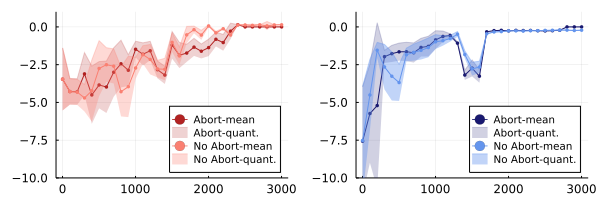

In [31]:
EP_LENGTH=24
season="summer"
NUM_EP = 3001
L1=400
L2=300
case= "$(season)_L2_nns_abort-0"
idx=2401
BSON.@load "out/bson/DDPG_Shems_v12_$(EP_LENGTH)_$(NUM_EP)_$(L1)_$(L2)_$(case)_scores_$(idx).bson" total_reward score_mean best_run

p1 = plot(1:100:NUM_EP, score_mean[:,1], 
        markershape=:circle, legend=:bottomright, markersize=2, markerstrokewidth=0.1,
        color=:firebrick, label=" Abort-mean", legendfontsize=7, ylim=(-10,1))

p1 = plot!(1:100:NUM_EP, score_mean[:,1] + score_mean[:,2], fillrange=score_mean[:,1] - score_mean[:,2], 
        colour =:firebrick, alpha=0.2, label=" Abort-quant.")
#-------------------------------------------------------------------
case= "$(season)_L2_nns_no-abort"
idx=3001

BSON.@load "out/bson/DDPG_Shems_v12_$(EP_LENGTH)_$(NUM_EP)_$(L1)_$(L2)_$(case)_scores_$(idx).bson" total_reward score_mean best_run

p1 = plot!(1:100:NUM_EP, score_mean[:,1], 
        markershape=:circle, legend=:bottomright, markersize=2, markerstrokewidth=0.1,
        color=:salmon, label=" No Abort-mean")

p1 = plot!(1:100:NUM_EP, score_mean[:,1] + score_mean[:,2], fillrange=score_mean[:,1] - score_mean[:,2], 
        colour =:salmon, alpha=0.3, label=" No Abort-quant.")

#-------------------------------------------------------------------
season="winter"
case= "$(season)_L2_nns_abort-0"
idx=2701

BSON.@load "out/bson/DDPG_Shems_v12_$(EP_LENGTH)_$(NUM_EP)_$(L1)_$(L2)_$(case)_scores_$(idx).bson" total_reward score_mean best_run

p2 = plot(1:100:NUM_EP, score_mean[:,1], 
        markershape=:circle, legend=:bottomright, markersize=2, markerstrokewidth=0.1,
        color=:midnightblue, label=" Abort-mean", legendfontsize=7, ylim=(-10,1))

p2 = plot!(1:100:NUM_EP, score_mean[:,1] + score_mean[:,2], fillrange=score_mean[:,1] - score_mean[:,2], 
        colour =:midnightblue, alpha=0.2, label=" Abort-quant.")
#-------------------------------------------------------------------
case= "$(season)_L2_nns_no-abort"
idx=3001

BSON.@load "out/bson/DDPG_Shems_v12_$(EP_LENGTH)_$(NUM_EP)_$(L1)_$(L2)_$(case)_scores_$(idx).bson" total_reward score_mean best_run

p2 = plot!(1:100:NUM_EP, score_mean[:,1], 
        markershape=:circle, legend=:bottomright, markersize=2, markerstrokewidth=0.1,
        color=:cornflowerblue, label=" No Abort-mean")

p2 = plot!(1:100:NUM_EP, score_mean[:,1] + score_mean[:,2], fillrange=score_mean[:,1] - score_mean[:,2], 
        colour =:cornflowerblue, alpha=0.4, label=" No Abort-quant.")

plot(p1,p2,layout=(1,2), size=(2*300, 1*200))

#savefig("analysis/learning.pdf")
#savefig("analysis/learning.png")
